In [0]:
"""
    This notebook is to show some of an LSTM's limitations
"""

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

# Shift array
df["PrevClose"] = df["close"].shift(1)
df["Return"] = (df["close"] - df["PrevClose"]) / df["PrevClose"]

In [100]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [101]:
df.tail()

,date,open,high,low,close,volume,Name,PrevClose,Return
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX,56.81,-0.014258
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX,56.00,-0.004107
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX,55.77,-0.019365
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX,54.69,0.016822
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX,55.61,-0.020680


In [0]:
# Turn all data into np arrays
input_data = df[["open", "high", "low", "close", "volume"]].values
targets = df["Return"].values

In [0]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [0]:
# Normalize inputs
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [105]:
# Setup X and Y train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros((Ntrain))

for t in range(Ntrain):
    X_train[T, :, :] = input_data[t:t+T]
    Y_train[t] = (targets[t+T] > 0)

print("X shape: ", X_train.shape, " | Y shape: ", Y_train.shape)

X shape:  (839, 10, 5)  | Y shape:  (839,)


In [106]:
# Setup X and Y test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros((N - Ntrain))

for u in range(N - Ntrain):
    t = u + Ntrain

    X_test[u, :, :] = input_data[t:t+T]
    Y_test[u] = (targets[t+T] > 0)

print("X shape: ", X_test.shape, " | Y shape: ", Y_test.shape)

X shape:  (410, 10, 5)  | Y shape:  (410,)


In [0]:
# Build a LSTM model
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation="sigmoid")(x)

model= Model(i, x)
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.001),
    metrics=["accuracy"]
)

In [108]:
# Train the model
r = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test, Y_test))

Epoch 1/300
27/27 [==============================] - 1s 25ms/step - loss: 0.6935 - accuracy: 0.5137 - val_loss: 0.6995 - val_accuracy: 0.5122
Epoch 2/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5256 - val_loss: 0.7892 - val_accuracy: 0.5146
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5256 - val_loss: 0.8601 - val_accuracy: 0.5146
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5256 - val_loss: 1.0984 - val_accuracy: 0.5146
Epoch 5/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5256 - val_loss: 1.2206 - val_accuracy: 0.5146
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5256 - val_loss: 1.4875 - val_accuracy: 0.5146
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5256 - val_loss: 1.7068 - val_accuracy: 0.5146
Epoch 8/300


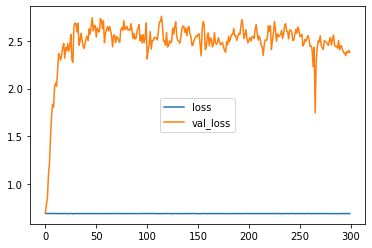

In [109]:
# Plot loss
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

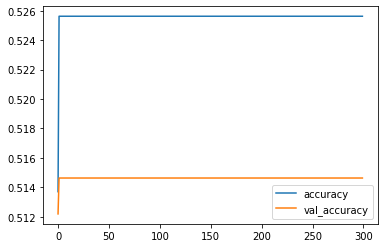

In [110]:
# Plot accuracy
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()